In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

unclean_data=pd.read_excel('complete_dataset_uncleaned_new.xlsx')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

In [2]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:
data2=clean_dataset(data2)

In [6]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_excel('complete_dataset_cleaned_RR.xlsx')
data.pop('Pkey')
data.pop('human_development_index')


data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Algeria,2020-07-17,13.42,0.11,1.20,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.40
1,Algeria,2020-07-18,13.60,0.25,1.18,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.52
2,Algeria,2020-07-20,13.74,0.20,1.15,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.45
3,Algeria,2020-07-21,13.29,0.29,1.14,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.27
4,Algeria,2020-07-22,13.45,0.25,1.13,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14597,United States,2021-07-14,92.44,0.97,1.49,104.09,46.75,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,15.59
14598,United States,2021-07-15,94.82,1.06,1.51,104.25,46.74,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,16.24
14599,United States,2021-07-16,231.58,1.34,1.52,104.44,46.74,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,17.17
14600,United States,2021-07-17,41.67,0.21,1.51,104.56,46.73,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,17.79


In [7]:
data1=data[data['location']=='Germany']
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2020-03-20,35.46,0.13,2.40,0.00,57.87,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,2.40
2020-03-21,32.43,0.19,2.31,0.00,68.06,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,3.69
2020-03-22,23.36,0.10,2.24,0.00,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,4.36
2020-03-23,48.70,0.37,2.20,0.00,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,5.41
2020-03-24,57.12,0.34,2.13,0.00,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,18.56,0.34,1.31,103.22,67.59,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,4.77
2021-07-15,19.69,0.38,1.34,104.17,67.59,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,4.75
2021-07-16,17.46,0.22,1.36,104.93,67.59,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,4.54


In [8]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,13]]
df=clean_dataset(df)
df

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
2020-03-20,0.000696,0.000235,0.422609,0.000000,0.5787,0.013305
2020-03-21,0.000637,0.000343,0.406957,0.000000,0.6806,0.020456
2020-03-22,0.000459,0.000181,0.394783,0.000000,0.7685,0.024170
2020-03-23,0.000956,0.000668,0.387826,0.000000,0.7685,0.029991
2020-03-24,0.001122,0.000614,0.375652,0.000000,0.7685,0.040967
...,...,...,...,...,...,...
2021-07-14,0.000364,0.000614,0.233043,0.281353,0.6759,0.026443
2021-07-15,0.000387,0.000686,0.238261,0.283943,0.6759,0.026332
2021-07-16,0.000343,0.000397,0.241739,0.286014,0.6759,0.025168


In [9]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.1 MB/s eta 0:00:00


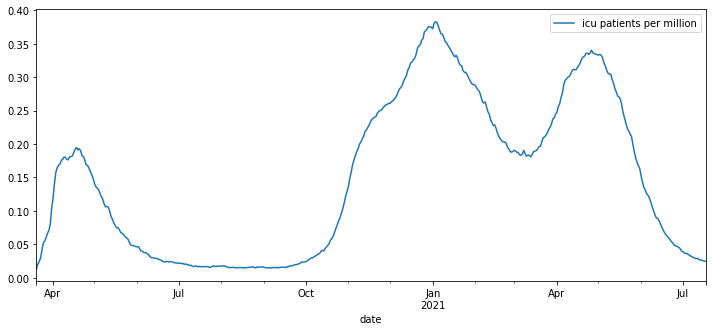

In [10]:
df.icu_patients_per_million.plot(figsize=(12,5), label='icu patients per million')
plt.legend(loc="upper right")

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
stepwise_fit = auto_arima(train['icu_patients_per_million'],exog=train.iloc[:,0:4], m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
#print(test.iloc[0],test.iloc[-1])

(486, 6)
(396, 6) (90, 6)
Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,0,1)[14] intercept   : AICC=-3611.557, Time=7.76 sec
 ARIMA(0,0,0)(0,0,0)[14] intercept   : AICC=-561.006, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[14] intercept   : AICC=inf, Time=3.42 sec
 ARIMA(0,0,1)(0,0,1)[14] intercept   : AICC=inf, Time=2.05 sec
 ARIMA(0,0,0)(0,0,0)[14]             : AICC=-197.282, Time=0.05 sec
 ARIMA(2,0,2)(0,0,1)[14] intercept   : AICC=-3612.217, Time=3.11 sec
 ARIMA(2,0,2)(0,0,0)[14] intercept   : AICC=-3594.152, Time=1.24 sec
 ARIMA(2,0,2)(0,0,2)[14] intercept   : AICC=-3613.548, Time=6.04 sec
 ARIMA(2,0,2)(1,0,2)[14] intercept   : AICC=-3610.573, Time=7.73 sec
 ARIMA(1,0,2)(0,0,2)[14] intercept   : AICC=-3318.460, Time=9.01 sec
 ARIMA(2,0,1)(0,0,2)[14] intercept   : AICC=-3575.920, Time=3.36 sec
 ARIMA(3,0,2)(0,0,2)[14] intercept   : AICC=-3612.054, Time=9.60 sec
 ARIMA(2,0,3)(0,0,2)[14] intercept   : AICC=-3609.675, Time=6.28 sec
 ARIMA(1,0,1)(0,0,2)[14] intercept   : AICC=-33

90
0.4182512609742663


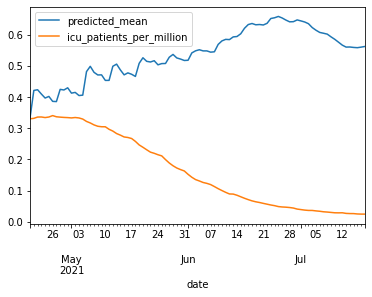

In [13]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,2),seasonal_order=(0,0,2,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

In [14]:
predicted_list, error_list = [], []
training_data = train
modela = SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,2),seasonal_order=(0,0,2,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.175


In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.5316e-04
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5298e-04
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5231e-04
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5223e-04
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5224e-04
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5172e-04
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5168e-04
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5161e-04
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5116e-04
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5031e-04
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5111e-04
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 3ms/step


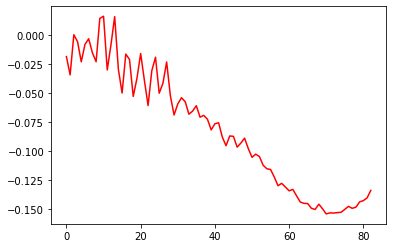

Test MSE: 0.116


In [16]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

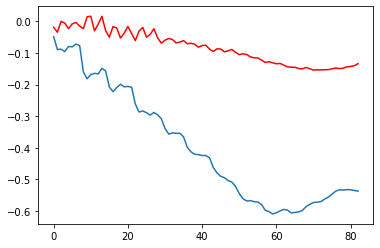

Test MSE: 0.116


In [17]:
pred
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.097


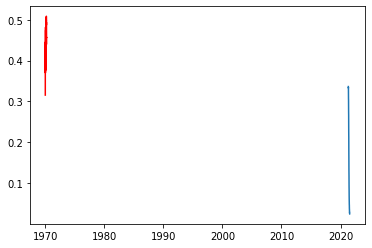

In [18]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

In [19]:
p1=list(pred_final)
tmp=data1.iloc[-83:,:]
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0     56.942354
1     69.748467
2     76.396709
3     72.836118
4     67.395094
        ...    
78    82.236501
79    82.545207
80    81.173106
81    80.155563
82    79.659506
Name: 13, Length: 83, dtype: float64

In [20]:
final={"falling":p1}
final=pd.DataFrame(p1)
final.to_csv('Output_2023_03_09.csv')